In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report


In [11]:
df = pd.read_excel('/content/vitiligo_treatment_dataset (1).xlsx')
df.head()

,Patient ID,Age,Stage,Duration (weeks),Speed Rate,Percentage Affected Before,Percentage Affected After,Difference (Before-After),Treatment Type
0,P001,56,Moderate Stage,19,1.12,39.7,30.8,8.9,Pharmacological: Calcineurin inhibitors; Physi...
1,P002,19,Advanced Stage,45,5.19,89.2,50.9,38.3,Pharmacological: Corticosteroids; Physical: Na...
2,P003,76,Initial Stage,11,0.12,14.7,11.3,3.4,Pharmacological: Calcineurin inhibitors; Physi...
3,P004,65,Progressive Stage,24,1.45,51.3,28.1,23.2,Pharmacological: Calcineurin inhibitors; Physi...
4,P005,25,Moderate Stage,4,24.06,23.3,5.8,17.5,Pharmacological: Corticosteroids; Physical: Na...


In [12]:
df_cleaned = df.dropna()

df_cleaned = df_cleaned.drop_duplicates()

df_cleaned['Age'] = df_cleaned['Age'].astype(int)
df_cleaned['Duration (weeks)'] = df_cleaned['Duration (weeks)'].astype(int)
df_cleaned['Speed Rate'] = df_cleaned['Speed Rate'].astype(float)
df_cleaned['Percentage Affected Before'] = df_cleaned['Percentage Affected Before'].astype(float)
df_cleaned['Percentage Affected After'] = df_cleaned['Percentage Affected After'].astype(float)
df_cleaned['Difference (Before-After)'] = df_cleaned['Difference (Before-After)'].astype(float)

df_cleaned = df_cleaned[df_cleaned['Age'] >= 0]
df_cleaned = df_cleaned[df_cleaned['Speed Rate'] <= df_cleaned['Speed Rate'].quantile(0.99)]

df_cleaned.to_excel('cleaned_vitiligo_dataset.xlsx', index=False)

df_cleaned.head()

,Patient ID,Age,Stage,Duration (weeks),Speed Rate,Percentage Affected Before,Percentage Affected After,Difference (Before-After),Treatment Type
0,P001,56,Moderate Stage,19,1.12,39.7,30.8,8.9,Pharmacological: Calcineurin inhibitors; Physi...
1,P002,19,Advanced Stage,45,5.19,89.2,50.9,38.3,Pharmacological: Corticosteroids; Physical: Na...
2,P003,76,Initial Stage,11,0.12,14.7,11.3,3.4,Pharmacological: Calcineurin inhibitors; Physi...
3,P004,65,Progressive Stage,24,1.45,51.3,28.1,23.2,Pharmacological: Calcineurin inhibitors; Physi...
4,P005,25,Moderate Stage,4,24.06,23.3,5.8,17.5,Pharmacological: Corticosteroids; Physical: Na...


In [13]:
# Feature selection (select features to use for training, excluding Speed Rate)
X = df[['Age', 'Percentage Affected Before', 'Percentage Affected After', 'Duration (weeks)']]

# Target value: Treatment Type (encode categorical target)
label_encoder_treatment = LabelEncoder()
df['Treatment Type'] = label_encoder_treatment.fit_transform(df['Treatment Type'])
y = df['Treatment Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForest model for Treatment Type prediction
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Treatment Type Classification Report:")
target_names = list(label_encoder_treatment.classes_)  # Extract string class names from label encoder
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Treatment Type Classification Report:
                                                                                                               precision    recall  f1-score   support

        Pharmacological: Calcineurin inhibitors; Physical: Excimer laser; Depigmentation: Phenol-based creams       0.92      0.83      0.87        29
      Pharmacological: Calcineurin inhibitors; Physical: Narrow-band UVB; Depigmentation: Phenol-based creams       0.90      0.82      0.86        11
  Pharmacological: Corticosteroids; Physical: Excimer laser; Depigmentation: Monobenzyl ether of hydroquinone       0.74      0.88      0.80        16
Pharmacological: Corticosteroids; Physical: Narrow-band UVB; Depigmentation: Monobenzyl ether of hydroquinone       0.96      0.98      0.97        44

                                                                                                     accuracy                           0.90       100
                                                      

In [14]:
import pickle

# Train the RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Save the trained RandomForest model
with open('vitiligo_treatment_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

# Save the label encoder
with open('label_encoder_treatment.pkl', 'wb') as le_file:
    pickle.dump(label_encoder_treatment, le_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model, label encoder, and scaler saved.")


Model, label encoder, and scaler saved.


In [15]:
def classify_vitiligo_stage(percentage):
    """Classify the stage of vitiligo based on the percentage affected."""
    if percentage >= 75:
        return "75% and above: Advanced Stage"
    elif percentage >= 40:
        return "40-74%: Progressive Stage"
    elif percentage >= 15:
        return "15-40%: Moderate Stage"
    elif percentage >= 5:
        return "5-15%: Initial Stage"
    else:
        return "0-5%: No Vitiligo"

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shinynose/vitiligo")

print("Path to dataset files:", path)

100%|██████████| 124M/124M [00:06<00:00, 19.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shinynose/vitiligo/versions/1


In [17]:
import os

# Verify the folder structure
for root, dirs, files in os.walk(path):
    print(root, dirs, len(files))


/root/.cache/kagglehub/datasets/shinynose/vitiligo/versions/1 ['healthy', 'vitiligo'] 0
/root/.cache/kagglehub/datasets/shinynose/vitiligo/versions/1/healthy [] 1528
/root/.cache/kagglehub/datasets/shinynose/vitiligo/versions/1/vitiligo [] 2100


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# Path to dataset
base_dir = path  # Use the correct path from kagglehub download

# Set image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Create ImageDataGenerators for training and validation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # 80% training, 20% validation split
)

# Flow images from directory for training and validation
train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification: vitiligo or healthy
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 2869 images belonging to 2 classes.
Found 716 images belonging to 2 classes.


In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    validation_data=val_gen,
    validation_steps=val_gen.samples // batch_size,
    epochs=10  # You can change the number of epochs based on your needs
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.7093 - loss: 0.6604 - val_accuracy: 0.9531 - val_loss: 0.1697
Epoch 2/10
 1/89 ━━━━━━━━━━━━━━━━━━━━ 4:37 3s/step - accuracy: 0.7812 - loss: 0.3483

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7812 - loss: 0.3483 - val_accuracy: 1.0000 - val_loss: 0.0667
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.8632 - loss: 0.3160 - val_accuracy: 0.9304 - val_loss: 0.2191
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9062 - loss: 0.1673 - val_accuracy: 1.0000 - val_loss: 0.1075
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 0.8730 - loss: 0.2845 - val_accuracy: 0.9318 - val_loss: 0.1899
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.9062 - loss: 0.2299 - val_accuracy: 0.8333 - val_loss: 0.4531
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 422s 4s/step - accuracy: 0.8887 - loss: 0.2567 - val_accuracy: 0.9006 - val_loss: 0.3001
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9375 - loss: 0.1804 - val_accuracy: 0.7500 - val_loss: 0.5369
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.9137 - loss: 0.2028 - val_accuracy: 0.9134 - val_loss: 0.2

In [23]:
# Evaluate the model
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9246 - loss: 0.2226
Validation Accuracy: 92.74%


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the target image dimensions
img_height, img_width = 224, 224  # Set to the same dimensions as used in model training

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)

    # Determine prediction label based on model output
    result = "Vitiligo" if prediction[0] > 0.5 else "Healthy"
    return result

# Test with an image and save the result to a variable
prediction_result = predict_image('/content/download (1).png')
print(f"Predicted: {prediction_result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted: Vitiligo


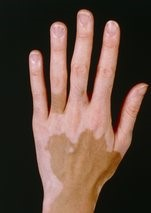

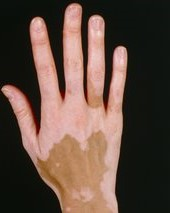

In [26]:
def upload_and_display_image(name):
    image = cv2.imread(name)
    cv2_imshow(image)

upload_and_display_image("/content/download.png")
upload_and_display_image("/content/download (1).png")

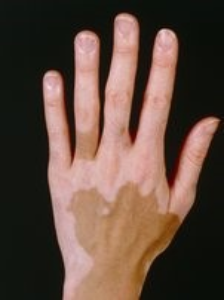

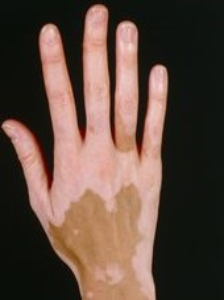

In [27]:
desired_width = 224
desired_height = 300

before_image1 = cv2.imread("/content/download.png")
current_image2 = cv2.imread("/content/download (1).png")

before_image = cv2.resize(before_image1, (desired_width, desired_height))
current_image = cv2.resize(current_image2, (desired_width, desired_height))

cv2.imwrite("resized_before_image.jpg", before_image)
cv2.imwrite("resized_current_image.jpg", current_image)

cv2_imshow(before_image)
cv2_imshow(current_image)

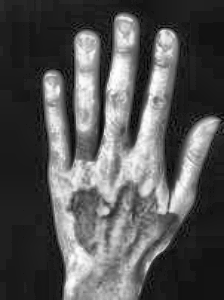

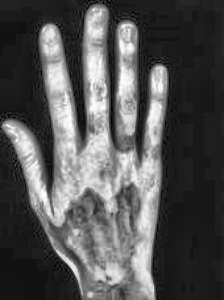

In [28]:
def adjust_contrast(image):
    # Apply histogram equalization to adjust contrast
    clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8, 8))  # Increase clipLimit for darker areas
    adjusted_image = clahe.apply(image)
    return adjusted_image

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

before_gray = convert_to_grayscale(before_image)
current_gray = convert_to_grayscale(current_image)

before_adjusted = adjust_contrast(before_gray)
current_adjusted = adjust_contrast(current_gray)

cv2_imshow(before_adjusted)
cv2_imshow(current_adjusted)

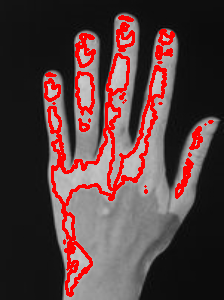

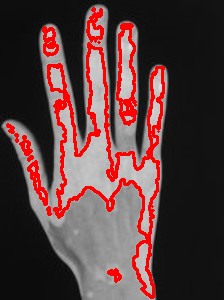

Before Image - Affected Area: 6642.0
Current Image - Affected Area: 9706.0


In [29]:
import cv2

def segment_and_draw_contours(image):
    # Apply thresholding to separate black regions
    _, black_image = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)

    # Find contours in the black regions
    black_contours, _ = cv2.findContours(black_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert grayscale image to color (so we can draw colored contours)
    mask = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Draw contours on the image (red for black regions)
    cv2.drawContours(mask, black_contours, -1, (0, 0, 255), 2)  # Red for black regions

    # Calculate the area of the affected region
    affected_area = sum(cv2.contourArea(c) for c in black_contours)  # Area of black contours

    # Display the result with contours
    cv2_imshow(mask)

    return mask, affected_area  # Return both the mask and the affected area

# Example usage for 'before_image' and 'current_image'
before_gray = convert_to_grayscale(before_image)
current_gray = convert_to_grayscale(current_image)

before_mask, before_affected_area = segment_and_draw_contours(before_gray)
current_mask, current_affected_area = segment_and_draw_contours(current_gray)

# Print the affected area
print(f"Before Image - Affected Area: {before_affected_area}")
print(f"Current Image - Affected Area: {current_affected_area}")


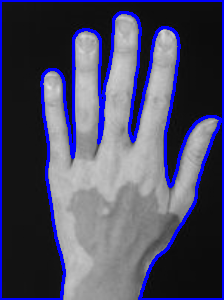

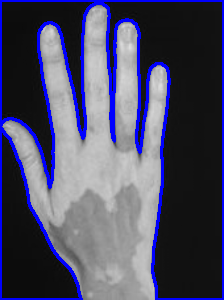

Total Area: 29983.0


In [30]:
import cv2

def segment_and_draw_black_contours(image):
    # Apply thresholding to isolate black areas
    _, black_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)  # Invert to get black areas

    # Find contours in the black regions
    black_contours, _ = cv2.findContours(black_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert grayscale image to color (so we can draw colored contours)
    mask = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Draw contours on the image (blue for black regions)
    cv2.drawContours(mask, black_contours, -1, (255, 0, 0), 2)  # Blue for black areas

    # Calculate the area of the black regions
    black_area = sum(cv2.contourArea(c) for c in black_contours)  # Area of black contours

    # Calculate the total area of the image
    total_area = image.shape[0] * image.shape[1]  # Height * Width

    # Calculate the area that is not black
    non_black_area = total_area - black_area

    # Display the result with contours
    cv2_imshow(mask)

    return mask, black_area, non_black_area  # Return the mask, black area, and non-black area

# Example usage for 'before_image' and 'current_image'
before_gray = convert_to_grayscale(before_image)
current_gray = convert_to_grayscale(current_image)

before_mask, before_black_area, before_non_black_area = segment_and_draw_black_contours(before_gray)
current_mask, current_black_area, current_non_black_area = segment_and_draw_black_contours(current_gray)

# Print the areas


print(f"Total Area: {current_non_black_area}")


In [31]:
before_percentage_red = (before_affected_area / current_non_black_area) * 100
current_percentage_red = (current_affected_area / current_non_black_area) * 100

print(f"Before Image - Affected Area: {before_affected_area} ({before_percentage_red:.2f}%)")
print(f"Current Image - Affected Area: {current_affected_area} ({current_percentage_red:.2f}%)")

Before Image - Affected Area: 6642.0 (22.15%)
Current Image - Affected Area: 9706.0 (32.37%)


In [32]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Now save the fitted scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [33]:
import pickle
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' contains your features for training
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Scale the training data before feeding it into the model
X_train_scaled = scaler.transform(X_train)

# Train your model on the scaled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Save the model, scaler, and label encoder
with open('vitiligo_treatment_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoder_treatment.pkl', 'wb') as le_file:
    pickle.dump(label_encoder_treatment, le_file)

print("Model, scaler, and label encoder saved.")


Model, scaler, and label encoder saved.


In [35]:
!pip install gradio


In [38]:
import gradio as gr
import cv2
import numpy as np

# Define image processing functions (adjust contrast, resize, calculate area)
def process_images(before_image, current_image):
    def convert_to_grayscale(image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    def adjust_contrast(image):
        clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8, 8))
        return clahe.apply(image)

    def segment_and_calculate_area(image):
        _, black_mask = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY_INV)
        contours, _ = cv2.findContours(black_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        return sum(cv2.contourArea(c) for c in contours)

    before_gray = convert_to_grayscale(before_image)
    current_gray = convert_to_grayscale(current_image)

    before_adjusted = adjust_contrast(before_gray)
    current_adjusted = adjust_contrast(current_gray)

    before_area = segment_and_calculate_area(before_adjusted)
    current_area = segment_and_calculate_area(current_adjusted)

    return before_area, current_area

# Chatbot function
def chatbot_interface(name, age, duration, before_area, current_area):
    stage = classify_vitiligo_stage(current_area)
    speed_rate = (before_area - current_area) / duration

    treatment = "Physical therapy" if speed_rate > 0.5 else "Medicine-based treatment"

    response = f"Hello {name}, age {age}. Based on the images, your vitiligo is in the {stage} stage. "
    response += f"The speed of improvement is {speed_rate:.2f}. Recommended treatment: {treatment}."
    return response

# Define the Vitiligo stage classification
def classify_vitiligo_stage(percentage):
    if percentage >= 75:
        return "Advanced"
    elif percentage >= 40:
        return "Progressive"
    elif percentage >= 15:
        return "Moderate"
    elif percentage >= 5:
        return "Initial"
    else:
        return "No Vitiligo"

# Gradio UI setup
def calculate_and_chat(before_image, current_image, name, age, duration):
    before_area, current_area = process_images(before_image, current_image)
    chat_response = chatbot_interface(name, age, duration, before_area, current_area)
    return chat_response

# UI elements
with gr.Blocks() as demo:
    gr.Markdown("# Vitiligo Treatment Prediction")

    with gr.Row():
        # Left side for image uploads
        with gr.Column():
            before_image = gr.Image(label="Upload Before Treatment Image")
            current_image = gr.Image(label="Upload Current Image")

        # Right side for chatbot interface
        with gr.Column():
            name = gr.Textbox(label="Your Name")
            age = gr.Number(label="Your Age", value=30)
            duration = gr.Number(label="Duration Between Images (weeks)", value=4)
            chat_output = gr.Textbox(label="Treatment Prediction")

            # Button to process the inputs
            submit_button = gr.Button("Submit")
            submit_button.click(calculate_and_chat,
                                inputs=[before_image, current_image, name, age, duration],
                                outputs=chat_output)

# Launch the Gradio interface
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c9d74b80ac4ae2a26f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
